#  Demo to use mask and draw images 

In [1]:
import skxray.speckle_visibility.speckle_visibility as spe
import skxray.roi as roi
import skxray.correlation as corr
import skxray.speckle_visibility.xsvs as xsvs

import numpy as np
import os, sys

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm

In [4]:
data_dir = "/Volumes/Data/BeamLines/CHX/Luxi_description_files_for_duke/duke_cc_12C/"


In [5]:
duke_ndata = np.load(data_dir+"duke_img_1_5000.npy")
duke_dark = np.load(data_dir+"duke_dark.npy")

duke_data = []
for i in range(duke_ndata.shape[0]):
    duke_data.append(duke_ndata[i] - duke_dark)
    
duke_data = np.asarray(duke_data)    

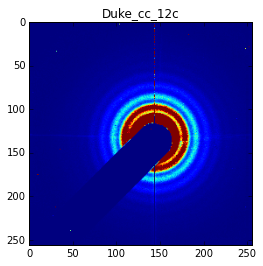

In [6]:
sum_img = np.average(duke_data, axis=0)

plt.imshow(sum_img, vmax=1e0)
plt.title("Duke_cc_12c")
plt.show()

In [8]:
mask_dir = "/Volumes/Data/BeamLines/CHX/Luxi_description_files_for_duke/"
mask = ~np.load(mask_dir+"Luxi_duke_mask.npy")
flat_field = np.load(mask_dir+"Luxi_duke_flat.npy")

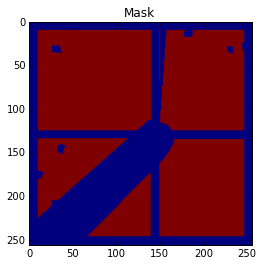

In [18]:
plt.imshow(mask)
plt.title("Mask")
plt.show()

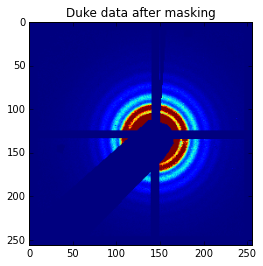

In [9]:
plt.imshow(mask*sum_img, vmax=1e0)
plt.title("Duke data after masking")
plt.show()

## Get the reqiured rings

In [13]:
inner_radius = 24
width = 3
spacing = 1
num_rings = 9
center = (133,143)

edges = roi.ring_edges(inner_radius, width, spacing, num_rings)

rings = roi.rings(edges, center, sum_img.shape)

def test_demo(ax, label_array, img_dim, image):
    """
    This will plot the reqiured roi's on the image
    """

    vmin, vmax = np.percentile(image, [100, 100])
    #im = ax.imshow(tt.reshape(*img_dim), cmap='Paired', interpolation='nearest')
    im = ax.imshow(image, interpolation='none', norm=LogNorm(), vmax=1e0)
    im = ax.imshow(label_array, interpolation='none', norm=LogNorm())
    #im = ax.imshow(image, interpolation='none',  vmax=1e0)

In [14]:
edges

array([[ 24.,  27.],
       [ 28.,  31.],
       [ 32.,  35.],
       [ 36.,  39.],
       [ 40.,  43.],
       [ 44.,  47.],
       [ 48.,  51.],
       [ 52.,  55.],
       [ 56.,  59.]])

## Plot data with rings

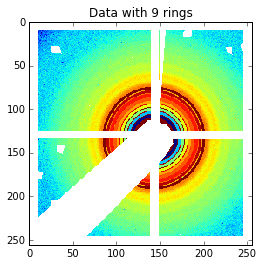

In [16]:
fig, ax = plt.subplots()
plt.title("Data with 9 rings")
test_demo(ax, rings*mask, sum_img.shape, sum_img*mask)
plt.show()